In [1]:
from pathlib import Path
import cv2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
VIDEO_DIR = Path("../../data/video")
OUTPUT_CSV = Path("../../data/processed/video_eda.csv")
OUTPUT_CSV.parent.mkdir(parents=True, exist_ok=True)


In [12]:
def analyze_video(video_path: Path) -> dict:
    cap = cv2.VideoCapture(str(video_path))

    if not cap.isOpened():
        return {
            "video_name": video_path.name,
            "status": "corrupt",
        }

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    duration = frame_count / fps if fps > 0 else 0

    cap.release()

    return {
        "video_name": video_path.name,
        "status": "ok",
        "fps": round(fps, 2),
        "frames": int(frame_count),
        "duration_sec": round(duration, 2),
        "width": int(width),
        "height": int(height),
        "resolution": f"{int(width)}x{int(height)}",
    }


Found 7010 videos


100%|██████████| 7010/7010 [00:46<00:00, 151.47it/s]



Saved EDA to: ../../data/processed/video_eda.csv

Basic stats:

           video_name status          fps       frames  duration_sec   width  \
count            7010   7010  7010.000000  7010.000000   7010.000000  7010.0   
unique           7010      1          NaN          NaN           NaN     NaN   
top     video6581.mp4     ok          NaN          NaN           NaN     NaN   
freq                1   7010          NaN          NaN           NaN     NaN   
mean              NaN    NaN    27.424738   406.062482     14.776847   320.0   
std               NaN    NaN     3.366262   150.173651      5.010634     0.0   
min               NaN    NaN     6.000000    60.000000      9.560000   320.0   
25%               NaN    NaN    25.000000   300.000000     11.010000   320.0   
50%               NaN    NaN    29.970000   360.000000     13.000000   320.0   
75%               NaN    NaN    29.970000   480.000000     17.000000   320.0   
max               NaN    NaN    30.000000   900.000000 

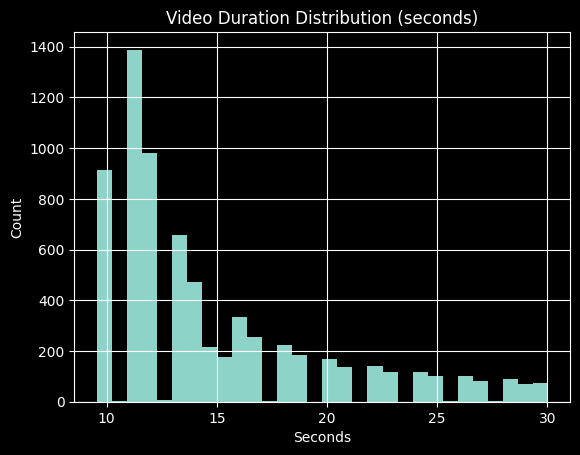

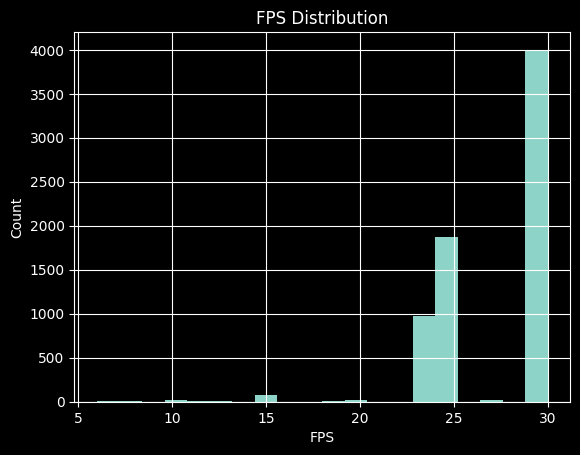


Top resolutions:
resolution
320x240    7010
Name: count, dtype: int64

Corrupt videos: 0


In [13]:
def main():
    video_files = list(VIDEO_DIR.glob("*.mp4"))

    print(f"Found {len(video_files)} videos")

    rows = []
    for video in tqdm(video_files):
        rows.append(analyze_video(video))

    df = pd.DataFrame(rows)
    df.to_csv(OUTPUT_CSV, index=False)

    print("\nSaved EDA to:", OUTPUT_CSV)
    print("\nBasic stats:\n")
    print(df.describe(include="all"))

    # -------------------
    # PLOTS
    # -------------------
    ok_df = df[df["status"] == "ok"]

    plt.figure()
    ok_df["duration_sec"].hist(bins=30)
    plt.title("Video Duration Distribution (seconds)")
    plt.xlabel("Seconds")
    plt.ylabel("Count")
    plt.show()

    plt.figure()
    ok_df["fps"].hist(bins=20)
    plt.title("FPS Distribution")
    plt.xlabel("FPS")
    plt.ylabel("Count")
    plt.show()

    print("\nTop resolutions:")
    print(ok_df["resolution"].value_counts().head(10))

    print("\nCorrupt videos:", (df["status"] == "corrupt").sum())


if __name__ == "__main__":
    main()